# Projet d'Analyse des Données – Service Public Administratif

**Auteur :** GBEDEVI Yawa Jacqueline  
**Sujet :** CAS D’ETUDE : OPTIMISER LE RESEAU DE SERVICES PUBLICS POUR LA DELIVRANCE DE DOCUMENTS OFFICIELS  
**Objectif :** Mettre en place un pipeline analytique complet (EDA → Nettoyage → KPI → Dashboard) afin d'améliorer le pilotage du service public  
**Date :** Janvier 2026  

---

## Livrables associés

- Notebook EDA + Nettoyage + KPI
- Tableau des KPI
- Dashboard Power BI
- Rapport de synthèse
- PPT Storytelling


  # **1. Imports**



In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata




# **2.   Chargement des datasets**



In [152]:
df_communes = pd.read_csv("Documents/gyj/Test_technique_analyst/data/details_communes.csv")
df_centres = pd.read_csv("Documents/gyj/Test_technique_analyst/data/centres_service.csv")
df_socio = pd.read_csv("Documents/gyj/Test_technique_analyst/data/donnees_socioeconomiques.csv")
df_dev = pd.read_csv("Documents/gyj/Test_technique_analyst/data/developpement.csv")
df_routes = pd.read_csv("Documents/gyj/Test_technique_analyst/data/reseau_routier_togo_ext.csv")
df_docs = pd.read_csv("Documents/gyj/Test_technique_analyst/data/documents_administratifs_ext.csv")
df_demandes = pd.read_csv("Documents/gyj/Test_technique_analyst/data/demandes_service_public.csv")
df_logs = pd.read_csv("Documents/gyj/Test_technique_analyst/data/logs_activite.csv")


# **PHASE 1: EDA**

## BLOC 1:

### **1. Aperçu structurel**


# **details_communes**

In [153]:
# Vérification des dimensions des dataframes
df_communes.shape

(200, 13)

In [154]:
# Vérification des types de variables
df_communes.dtypes

commune_id               object
commune                  object
prefecture               object
region                   object
latitude                float64
longitude               float64
altitude_m                int64
superficie_km2            int64
population_densite        int64
code_postal              object
type_commune             object
distance_capitale_km      int64
zone_climatique          object
dtype: object

In [155]:
# Aperçu du contenu
df_communes.head()


,commune_id,commune,prefecture,region,latitude,longitude,altitude_m,superficie_km2,population_densite,code_postal,type_commune,distance_capitale_km,zone_climatique
0,COM001,Vogan,Vo,Maritime,6.2295,1.5040,19,343,35,BP 272,Rurale,34,Côtière
1,COM002,Hahotoé,Vo,Maritime,6.6892,1.6588,39,398,210,BP 239,Semi-urbaine,79,Côtière
2,COM003,Anyronkopé,Vo,Maritime,6.4158,1.2398,47,215,76,BP 495,Rurale,31,Côtière
3,COM004,Momé,Vo,Maritime,6.2023,1.6180,41,230,95,BP 60,Rurale,45,Côtière
4,COM005,Dagbati,Vo,Maritime,6.3068,1.6507,25,318,58,BP 235,Rurale,52,Côtière


**Aperçu dataset** : COMMUNES\
 **Dimensions :** (200 , 13)\
 **Types :** object + int    
 **Colonnes importantes :** commune_id, commune, prefecture, region, population, type_commune, distance_capitale, latitude, longitude\
 **Notes :** ce dataset répertorie les informations concernant les communes existant au Togo.

# **centres_service.csv**

In [156]:
# Vérification des dimensions des dataframes
df_centres.shape

(55, 16)

In [157]:
# Vérification des types de variables
df_centres.dtypes

centre_id                   object
nom_centre                  object
type_centre                 object
region                      object
prefecture                  object
commune                     object
quartier                    object
latitude                   float64
longitude                  float64
personnel_capacite_jour      int64
nombre_guichets              int64
heures_ouverture            object
horaire_nuit                object
equipement_numerique        object
date_ouverture              object
statut_centre               object
dtype: object

In [158]:
# Aperçu du contenu
df_centres.head()


,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.5920,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif
1,CT002,Centre Kévé,Secondaire,Maritime,Ave,Kévé,Zone industrielle,6.2815,1.2182,63,2,08:00-16:00,Non,Limite,2020-09-14,Actif
2,CT003,Centre Gando,Secondaire,Savanes,Oti-Sud,Gando,Zone industrielle,10.2629,0.2525,98,2,08:00-16:00,Non,Partiel,2015-06-02,Actif
3,CT004,Centre Pagouda,Secondaire,Kara,Binah,Pagouda,Gare routière,9.4247,1.1698,78,6,08:00-16:00,Non,Partiel,2019-12-03,Actif
4,CT005,Centre Tchamba,Secondaire,Centrale,Tchamba,Tchamba,Carrefour,8.5008,0.9988,62,3,08:00-16:00,Non,Limite,2022-10-20,Actif


**Aperçu dataset :** \
**CENTRES Dimensions :** (55 , 16) \
**Types :** object + int + float \
**Colonnes importantes :** centre_id, nom_centre, type_centre, prefecture, region, commune, quartier, latitude,longitude, personnel_capacite_jour, nombre_guichets, equipement_numerique, statut_centre \
**Notes :** ce dataset répertorie les informations concernant les centres de traitement des demandes des documents officiel au Togo.

#**donnees_socioecomiques.csv**

In [159]:
# Vérification des dimensions des dataframes
df_socio.shape

(115, 11)

In [160]:
# Vérification des types de variables
df_socio.dtypes

region                   object
prefecture               object
commune                  object
population                int64
superficie_km2            int64
densite                   int64
taux_urbanisation       float64
taux_alphabétisation    float64
age_median                int64
nombre_menages            int64
revenu_moyen_fcfa         int64
dtype: object

In [161]:
# Aperçu du contenu
df_socio.head()


,region,prefecture,commune,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa
0,Maritime,Vo,Vogan,48777,478,102,0.33,0.76,19,8590,78348
1,Maritime,Vo,Hahotoé,13939,444,31,0.35,0.66,21,3973,112380
2,Maritime,Vo,Anyronkopé,23395,355,65,0.18,0.72,21,4534,107120
3,Maritime,Vo,Momé,19379,302,64,0.10,0.81,22,4207,99265
4,Maritime,Vo,Dagbati,14846,309,48,0.32,0.79,22,3170,133012


**Aperçu dataset :** Socio-economique \
**Dimensions :** (115 , 11) \
**Types :** object + int + float \
**Colonnes importantes :** region, prefecture, commune, population, superficie_km2, densite, taux_urbanisation, taux_alphabétisation, age_median, nombre_menages, revenu_moyen_fcfa \
**Notes** : ce dataset répertorie les informations socioéconomique de la population par région,préfecture et commune au Togo.

# **developpement.csv**

In [162]:
# Vérification des dimensions des dataframes
df_dev.shape

(33, 15)

In [163]:
# Vérification des types de variables
df_dev.dtypes

region                    object
prefecture                object
commune                   object
pib_par_habitant_fcfa      int64
taux_chomage             float64
taux_pauvrete            float64
acces_electricite        float64
acces_eau_potable        float64
acces_internet           float64
indice_developpement     float64
score_education          float64
score_sante              float64
nombre_ecoles              int64
nombre_hopitaux            int64
nombre_banques             int64
dtype: object

In [164]:
# Aperçu du contenu
df_dev.head()


,region,prefecture,commune,pib_par_habitant_fcfa,taux_chomage,taux_pauvrete,acces_electricite,acces_eau_potable,acces_internet,indice_developpement,score_education,score_sante,nombre_ecoles,nombre_hopitaux,nombre_banques
0,Maritime,Vo,Lomé,860000,0.11,0.24,0.96,0.93,0.67,0.74,0.79,0.76,250,19,48
1,Maritime,Vo,Adakpamé,830000,0.12,0.26,0.94,0.91,0.63,0.71,0.77,0.74,220,16,40
2,Maritime,Golfe,Bè,720000,0.13,0.27,0.92,0.89,0.60,0.69,0.75,0.73,190,13,30
3,Maritime,Golfe,Agoè,700000,0.14,0.29,0.91,0.88,0.58,0.67,0.73,0.71,175,12,26
4,Maritime,Lacs,Aného,560000,0.16,0.31,0.86,0.83,0.46,0.63,0.69,0.66,98,6,16


**Aperçu dataset :** Developpement \
**Dimensions** : (33 , 15) \
**Types :** object + int + float
**Colonnes importantes :** region, prefecture, commune, pib_par_habitant_fcfa, taux_chomage, taux_pauvrete, acces_electricite, acces_eau_potable, acces_internet, indice_developpement, score_education, score_sante, nombre_ecoles, nombre_hopitaux, nombre_banques \
**Notes :** ce dataset contient les indicateurs de mesure du développement par region, prefecture, communel au Togo.

# **reseau_routier_togo_ext.csv**

In [165]:
# Vérification des dimensions des dataframes
df_routes.shape

(40, 14)

In [166]:
# Vérification des types de variables
df_routes.dtypes

route_id                   object
type_route                 object
nom_route                  object
region_origine             object
region_destination         object
prefecture_origine         object
prefecture_destination     object
longueur_km                 int64
etat_route                 object
temps_parcours_heures     float64
points_controle             int64
bus_par_jour                int64
camions_par_jour            int64
passagers_par_jour          int64
dtype: object

In [167]:
# Aperçu du contenu
df_routes.head()


,route_id,type_route,nom_route,region_origine,region_destination,prefecture_origine,prefecture_destination,longueur_km,etat_route,temps_parcours_heures,points_controle,bus_par_jour,camions_par_jour,passagers_par_jour
0,R001,Nationale,RN1,Maritime,Plateaux,Vo,Ogou,150,Bon,2.5,3,85,45,1250
1,R002,Nationale,RN2,Plateaux,Centrale,Ogou,Sotouboua,120,Moyen,2.8,2,65,35,950
2,R003,Nationale,RN3,Centrale,Kara,Sotouboua,Kozah,110,Moyen,2.6,2,60,30,850
3,R004,Nationale,RN4,Kara,Savanes,Kozah,Oti,95,Mediocre,3.0,2,45,25,650
4,R005,Nationale,RN5,Maritime,Kara,Vo,Kozah,420,Moyen,8.5,6,70,55,1600


**Aperçu dataset :** RESEAUX ROUTIERS \
**Dimensions :** (40 , 14) \
**Types :** object + int + float \
**Colonnes importantes :** route_id type_route nom_route region_origine region_destination prefecture_origine prefecture_destination longueur_km etat_route temps_parcours_heures points_controle bus_par_jour camions_par_jour passagers_par_jour \
**Notes :** ce dataset répertorie les informations concernant les réseaux routiers au Togo.

# **demandes_service_public.csv**

In [168]:
# Vérification des dimensions des dataframes
df_demandes.shape

(600, 16)

In [169]:
# Vérification des types de variables
df_demandes.dtypes

demande_id                 object
region                     object
prefecture                 object
commune                    object
quartier                   object
type_document              object
categorie_document         object
nombre_demandes             int64
delai_traitement_jours      int64
taux_rejet                float64
date_demande               object
motif_demande              object
statut_demande             object
canal_demande              object
age_demandeur               int64
sexe_demandeur             object
dtype: object

In [170]:
# Aperçu du contenu
df_demandes.head()


,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
0,D001,Centrale,Sotouboua,Sotouboua,Nyékonakpoé,Carte d'identité,Identité,168,1,0.00,2023-09-30,Perte,Rejetée,En ligne,27,M
1,D002,Kara,Binah,Pagouda,Hôpital,Carte d'identité,Identité,17,22,0.09,2023-12-22,Vol,Traitee,En ligne,21,F
2,D003,Plateaux,Ogou,Atakpamé,Bè,Certificat de nationalité,Identité,104,4,0.08,2023-08-13,Concours,Traitee,En ligne,18,M
3,D004,Savanes,Oti,Mango,Amoutivé,Carte d'identité,Identité,92,39,0.02,2023-06-08,Première demande,Rejetée,Guichet,64,M
4,D005,Maritime,Zio,Tsévié,Adidogomé,Livre de famille,Civil,138,7,0.12,2023-02-02,Détérioration,Rejetée,En ligne,30,M


**Aperçu dataset :** DEMANDES SERVICE PUBLIC \
**Dimensions :** (600 , 16) \
**Types :** object + int + float \
**Colonnes importantes :** demande_id region prefecture commune quartier type_document categorie_document nombre_demandes delai_traitement_jours taux_rejet date_demande motif_demande statut_demande canal_demande age_demandeur sexe_demandeur \
**Notes :** ce dataset contient les informations sur chaque demande de documents officiel au Togo.

# **documents_admistratifs.csv**

In [171]:
# Vérification des dimensions des dataframes
df_docs.shape

(64, 9)

In [172]:
# Vérification des types de variables
df_docs.dtypes

annee                  int64
mois                   int64
region                object
prefecture            object
commune               object
type_document         object
nombre_demandes        int64
delai_moyen_jours    float64
taux_rejet_moyen     float64
dtype: object

In [173]:
# Aperçu du contenu
df_docs.head()


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
0,2023,1,Maritime,Vo,Lomé,Carte d'identité,2450,12.5,0.05
1,2023,1,Maritime,Vo,Lomé,Passeport,1650,25.2,0.08
2,2023,1,Maritime,Vo,Lomé,Acte de naissance,890,10.1,0.02
3,2023,1,Maritime,Vo,Lomé,Livre de famille,620,15.3,0.03
4,2023,1,Maritime,Lacs,Aného,Carte d'identité,1250,14.5,0.04


**Aperçu dataset :** DOCUMENTS ADMINISTRATIFS \
**Dimensions :** (64, 9) \
**Types :** object + int + float \
**Colonnes importantes :** annee mois region prefecture commune type_document nombre_demandes delai_moyen_jours taux_rejet_moyen \
**Notes :** ce dataset contient les informations agrégées sur les demandes par année, mois..., des documents officiel au Togo.

# **logs_activites.csv**

In [174]:
# Vérification des dimensions des dataframes
df_logs.shape

(450, 14)

In [175]:
# Vérification des types de variables
df_logs.dtypes

log_id                         object
centre_id                      object
date_operation                 object
type_operation                 object
type_document                  object
nombre_traite                   int64
delai_effectif                  int64
nombre_rejete                   int64
raison_rejet                   object
personnel_present               int64
temps_attente_moyen_minutes     int64
incident_technique             object
heure_debut                    object
heure_fin                      object
dtype: object

In [176]:
# Aperçu du contenu
df_logs.head()


,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
0,LOG001,CT015,2023-10-30,Traitement,Carte d'identité,241,41,31,Non éligible,15,58,Non,08:00,16:00
1,LOG002,CT026,2023-04-21,Maintenance,NaN,0,0,0,NaN,12,0,Non,09:00,19:00
2,LOG003,CT049,2023-08-22,Traitement,Livre de famille,62,19,0,NaN,12,95,Non,08:30,17:30
3,LOG004,CT047,2023-07-13,Traitement,Acte de naissance,139,22,12,Double demande,7,54,Non,08:15,16:15
4,LOG005,CT008,2023-04-08,Traitement,Passeport,71,35,6,Double demande,13,94,Oui,08:30,17:30


**Aperçu dataset :** LOGS ACTIVITES \
**Dimensions :** (450 , 14) \
**Types :** object + int + float \
**Colonnes importantes :** log_id centre_id date_operation type_operation type_document nombre_traite delai_effectif nombre_rejete raison_rejet personnel_present temps_attente_moyen_minutes incident_technique heure_debut heure_fin \
**Notes** : ce dataset contient les informations de logs des traitements des demandes des documents officiel au Togo.

### **2. Identification des clés et observation**

# Identification des clés

L’objectif de cette étape est de comprendre la structure relationnelle des jeux de données afin d’identifier les clés primaires (PK), les clés étrangères (FK) et les relations potentielles entre tables.

---

## 1. Clés Primaires (PK)

| Dataset | Clé primaire | Commentaire |
|---|---|---|
| `details_communes` | `commune_id` | Identifie de manière unique chaque commune |
| `centres_services` | `centre_id` | Identifie de manière unique chaque centre |
| `donnees_socioeconomiques` | `(region, prefecture, commune)` | Identifie un territoire socio-économique |
| `developpement` | `(region, prefecture, commune)` | Identifie un territoire avec des indicateurs de développement |
| `reseau_routier_togo_ext` | `route_id` | Identifie de manière unique une route |
| `documents_administratifs` | `(annee, mois, region, prefecture, commune, type_document)` | Identifie un agrégat de demandes par période et territoire |
| `demandes_service_public` | `demande_id` | Identifie une demande individuelle |
| `logs_activites` | `log_id` | Identifie un événement de traitement dans un centre |

---

## 2. Clés Étrangères (FK)

| Dataset | Clé étrangère | Fait référence à | Commentaire |
|---|---|---|---|
| `centres_services` | `commune` | `details_communes` | Lie les centres aux communes |
| `donnees_socioeconomiques` | `commune` | `details_communes` | Associe les données socio-éco à un territoire |
| `developpement` | `commune` | `details_communes` | Associe les indicateurs de développement |
| `documents_administratifs` |`commune` | `details_communes` | Agrégats territoriaux |
| `demandes_service_public` |`commune` | `details_communes` | Associe chaque demande à un territoire |
| `logs_activites` | `centre_id` | `centres_services` | Associe un log à un centre |

---

## 3. Relations entre tables

Les relations observées entre les datasets sont :

- **Territoriales (géographiques)**  
  `details_communes` ←→ `centres_services` ←→ `demandes_service_public`  
  Basé sur : `region`, `prefecture`, `commune`

- **Opérationnelles (centres et logs)**  
  `centres_services` ←→ `logs_activites`  
  Basé sur : `centre_id`

- **Socio-économiques et développement**  
  `details_communes` ←→ `donnees_socioeconomiques`  
  `details_communes` ←→ `developpement`  
  Basé sur : `(region, prefecture, commune)`

- **Agrégations temporelles**  
  `demandes_service_public` → `documents_administratifs`  
  Basé sur : `(annee, mois, region, prefecture, commune, type_document)`

---

## 4. Observations sur la structure

- Le modèle de données est **centré sur le territoire** (commune → préfecture → région)
- Les centres de services sont **ancrés géographiquement**
- Les logs assurent la **traçabilité opérationnelle**
- Les indicateurs socio-éco et de développement enrichissent l’analyse
- `documents_administratifs` offre une **vision agrégée temporelle**
- Certaines tables n’ont pas de relation directe (ex : `reseau_routier_togo_ext`), mais peuvent être utilisées pour **l’accessibilité territoriale**

---

## 5. Conclusion

La structure relationnelle permet :

* d’analyser la charge par territoire  
* de lier les performances à des variables socio-éco  
* de mesurer l’efficacité opérationnelle des centres  
* de réaliser des croisements spatio-temporels complets

Cette étape valide que les données sont adaptées pour la suite du projet d’analyse.



# **BLOC 2: Qualité des données**


# **details_communes**

In [177]:
print("Dimensions :", df_communes.shape)
print("Types des colonnes :")
df_communes.dtypes


Dimensions : (200, 13)
Types des colonnes :


commune_id               object
commune                  object
prefecture               object
region                   object
latitude                float64
longitude               float64
altitude_m                int64
superficie_km2            int64
population_densite        int64
code_postal              object
type_commune             object
distance_capitale_km      int64
zone_climatique          object
dtype: object

In [178]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_communes.isnull().sum()


Valeurs manquantes :


commune_id              0
commune                 0
prefecture              0
region                  0
latitude                0
longitude               0
altitude_m              0
superficie_km2          0
population_densite      0
code_postal             0
type_commune            0
distance_capitale_km    0
zone_climatique         0
dtype: int64

In [179]:
#Vérifier les doublons
print("Doublons :", df_communes.duplicated(['commune', 'prefecture', 'region']).sum())


Doublons : 2


In [180]:
# Vérifier la granularité des données
df_communes.nunique()

commune_id              200
commune                 198
prefecture               37
region                    5
latitude                199
longitude               197
altitude_m              164
superficie_km2          161
population_densite      126
code_postal             160
type_commune              3
distance_capitale_km    164
zone_climatique           4
dtype: int64

In [181]:
# Décrire les valeurs numériques
df_communes.describe()


,latitude,longitude,altitude_m,superficie_km2,population_densite,distance_capitale_km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,8.153211,1.059142,290.525000,362.885000,208.610000,229.715000
std,1.513130,0.365370,205.517827,130.180477,569.698243,166.393624
min,6.112500,0.006700,8.000000,102.000000,20.000000,3.000000
25%,6.652650,0.840575,67.000000,249.750000,43.750000,67.250000
50%,7.759900,1.150050,283.500000,351.500000,77.000000,183.500000
75%,9.561700,1.314600,443.500000,479.000000,155.250000,381.000000
max,11.032300,1.688700,783.000000,600.000000,4690.000000,556.000000


In [182]:
# Décrire les variables catégorielles
df_communes.describe(include=['object'])

,commune_id,commune,prefecture,region,code_postal,type_commune,zone_climatique
count,200,200,200,200,200,200,200
unique,200,198,37,5,160,3,4
top,COM001,Cinkassé Central,Golfe,Maritime,BP 239,Rurale,Savane
freq,1,2,11,55,3,138,87


In [183]:
cat_cols = df_communes.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_communes[col].unique())

commune_id => ['COM001' 'COM002' 'COM003' 'COM004' 'COM005' 'COM006' 'COM007' 'COM008'
 'COM009' 'COM010' 'COM011' 'COM012' 'COM013' 'COM014' 'COM015' 'COM016'
 'COM017' 'COM018' 'COM019' 'COM020' 'COM021' 'COM022' 'COM023' 'COM024'
 'COM025' 'COM026' 'COM027' 'COM028' 'COM029' 'COM030' 'COM031' 'COM032'
 'COM033' 'COM034' 'COM035' 'COM036' 'COM037' 'COM038' 'COM039' 'COM040'
 'COM041' 'COM042' 'COM043' 'COM044' 'COM045' 'COM046' 'COM047' 'COM048'
 'COM049' 'COM050' 'COM051' 'COM052' 'COM053' 'COM054' 'COM055' 'COM056'
 'COM057' 'COM058' 'COM059' 'COM060' 'COM061' 'COM062' 'COM063' 'COM064'
 'COM065' 'COM066' 'COM067' 'COM068' 'COM069' 'COM070' 'COM071' 'COM072'
 'COM073' 'COM074' 'COM075' 'COM076' 'COM077' 'COM078' 'COM079' 'COM080'
 'COM081' 'COM082' 'COM083' 'COM084' 'COM085' 'COM086' 'COM087' 'COM088'
 'COM089' 'COM090' 'COM091' 'COM092' 'COM093' 'COM094' 'COM095' 'COM096'
 'COM097' 'COM098' 'COM099' 'COM100' 'COM101' 'COM102' 'COM103' 'COM104'
 'COM105' 'COM106' 'COM107' 'COM108' 

COMMUNES :

* Manquants : 0

* Doublons : 2

* Types incohérents : non

* Observations :

# **centres_service.csv**

In [184]:
print("Dimensions :", df_centres.shape)
print("Types des colonnes :")
df_centres.dtypes


Dimensions : (55, 16)
Types des colonnes :


centre_id                   object
nom_centre                  object
type_centre                 object
region                      object
prefecture                  object
commune                     object
quartier                    object
latitude                   float64
longitude                  float64
personnel_capacite_jour      int64
nombre_guichets              int64
heures_ouverture            object
horaire_nuit                object
equipement_numerique        object
date_ouverture              object
statut_centre               object
dtype: object

In [185]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_centres.isnull().sum()


Valeurs manquantes :


centre_id                  0
nom_centre                 0
type_centre                0
region                     0
prefecture                 0
commune                    0
quartier                   0
latitude                   0
longitude                  0
personnel_capacite_jour    0
nombre_guichets            0
heures_ouverture           0
horaire_nuit               0
equipement_numerique       0
date_ouverture             0
statut_centre              0
dtype: int64

In [186]:
#Vérifier les doublons
print("Doublons :", df_centres.duplicated(['nom_centre', 'commune', 'prefecture', 'region',"quartier"]).sum())


Doublons : 3


In [187]:

# S'il y a des doublons, lesquels ?
doublons_centres = df_centres[df_centres.duplicated(['nom_centre' ,'commune', 'prefecture', 'region','quartier'], keep=False)]
if not doublons_centres.empty:
    print("Centres avec le même nom :")
    print(doublons_centres[['nom_centre' ,'commune', 'prefecture', 'region','quartier']].sort_values('nom_centre'))


Centres avec le même nom :
          nom_centre    commune      prefecture    region     quartier
26   Centre Naki-Est   Naki-Est  Kpendjal-Ouest   Savanes        Poste
51   Centre Naki-Est   Naki-Est  Kpendjal-Ouest   Savanes        Poste
11  Centre Sotouboua  Sotouboua       Sotouboua  Centrale  Résidentiel
50  Centre Sotouboua  Sotouboua       Sotouboua  Centrale  Résidentiel
8     Centre Tchamba    Tchamba         Tchamba  Centrale  Résidentiel
52    Centre Tchamba    Tchamba         Tchamba  Centrale  Résidentiel


In [233]:
df_centres[df_centres['nom_centre'].isin(['Centre Naki-Est', 'Centre Sotouboua', 'Centre Tchamba'])][['centre_id','nom_centre','commune','quartier']]


,centre_id,nom_centre,commune,quartier
4,CT005,Centre Tchamba,Tchamba,Carrefour
8,CT009,Centre Tchamba,Tchamba,Résidentiel
11,CT012,Centre Sotouboua,Sotouboua,Résidentiel
12,CT013,Centre Tchamba,Tchamba,Centre ville
24,CT025,Centre Tchamba,Tchamba,Poste
26,CT027,Centre Naki-Est,Naki-Est,Poste
50,CT051,Centre Sotouboua,Sotouboua,Résidentiel
51,CT052,Centre Naki-Est,Naki-Est,Poste
52,CT053,Centre Tchamba,Tchamba,Résidentiel


In [188]:
# Décrire les valeurs numériques
df_centres.describe()


,latitude,longitude,personnel_capacite_jour,nombre_guichets
count,55.000000,55.000000,55.000000,55.000000
mean,8.345384,1.061744,126.418182,5.327273
std,1.492890,0.336674,95.720599,3.564509
min,6.214500,0.098700,32.000000,2.000000
25%,6.587650,0.844950,63.000000,2.000000
50%,8.685100,1.131300,88.000000,5.000000
75%,9.422350,1.300600,116.500000,6.000000
max,11.002200,1.680600,358.000000,14.000000


In [189]:
# Décrire les variables catégorielles
df_centres.describe(include=['object'])

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
count,55,55,55,55,55,55,55,55,55,55,55,55
unique,55,31,2,5,28,28,10,2,2,3,53,1
top,CT001,Centre Tchamba,Secondaire,Centrale,Tchamba,Tchamba,Résidentiel,08:00-16:00,Non,Partiel,2020-08-10,Actif
freq,1,5,43,16,5,5,8,43,52,31,2,55


In [190]:
cat_cols = df_centres.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_centres[col].unique())

centre_id => ['CT001' 'CT002' 'CT003' 'CT004' 'CT005' 'CT006' 'CT007' 'CT008' 'CT009'
 'CT010' 'CT011' 'CT012' 'CT013' 'CT014' 'CT015' 'CT016' 'CT017' 'CT018'
 'CT019' 'CT020' 'CT021' 'CT022' 'CT023' 'CT024' 'CT025' 'CT026' 'CT027'
 'CT028' 'CT029' 'CT030' 'CT031' 'CT032' 'CT033' 'CT034' 'CT035' 'CT036'
 'CT037' 'CT038' 'CT039' 'CT040' 'CT041' 'CT042' 'CT043' 'CT044' 'CT045'
 'CT046' 'CT047' 'CT048' 'CT049' 'CT050' 'CT051' 'CT052' 'CT053' 'CT054'
 'CT055']
nom_centre => ['Centre Principal Dapaong' 'Centre Kévé' 'Centre Gando' 'Centre Pagouda'
 'Centre Tchamba' 'Centre Principal Tsévié' 'Centre Bassar'
 'Centre Principal Kpalimé' 'Centre Principal Kara' 'Centre Sotouboua'
 'Centre Tohoun' 'Centre Danyi-Apéyémé' 'Centre Lomé' 'Centre Tandjouaré'
 'Centre Bafilo' 'Centre Aného' 'Centre Vogan' 'Centre Djarkpanga'
 'Centre Principal Sokodé' 'Centre Naki-Est' 'Centre Blitta-Gare'
 'Centre Dapaong' 'Centre Tabligbo' 'Centre Principal Lomé'
 'Centre Guérin-Kouka' 'Centre Sokodé' 'Centre Niamto

CENTRES :

* Manquants : 0

* Doublons : 3

* Types incohérents : date_ouverture=object

* Observations :

#**donnees_socioecomiques.csv**

In [191]:
print("Dimensions :", df_socio.shape)
print("Types des colonnes :")
df_socio.dtypes


Dimensions : (115, 11)
Types des colonnes :


region                   object
prefecture               object
commune                  object
population                int64
superficie_km2            int64
densite                   int64
taux_urbanisation       float64
taux_alphabétisation    float64
age_median                int64
nombre_menages            int64
revenu_moyen_fcfa         int64
dtype: object

In [192]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_socio.isnull().sum()


Valeurs manquantes :


region                  0
prefecture              0
commune                 0
population              0
superficie_km2          0
densite                 0
taux_urbanisation       0
taux_alphabétisation    0
age_median              0
nombre_menages          0
revenu_moyen_fcfa       0
dtype: int64

In [193]:
#Vérifier les doublons
print("Doublons :", df_socio.duplicated(['commune', 'prefecture', 'region']).sum())


Doublons : 0


In [194]:
# Vérifier la granularité des données
df_socio.nunique()

region                    5
prefecture               35
commune                 115
population              115
superficie_km2          100
densite                 105
taux_urbanisation        46
taux_alphabétisation     33
age_median                8
nombre_menages          113
revenu_moyen_fcfa       115
dtype: int64

In [195]:
# Décrire les valeurs numériques
df_socio.describe()


,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,50971.286957,266.008696,290.573913,0.325565,0.654696,21.539130,10259.460870,133782.713043
std,49819.726192,136.525012,311.039487,0.199654,0.091050,2.074435,9588.455479,55010.105232
min,8843.000000,50.000000,19.000000,0.100000,0.470000,18.000000,1616.000000,69126.000000
25%,26074.000000,149.000000,80.500000,0.190000,0.590000,20.000000,5362.500000,98436.500000
50%,42202.000000,267.000000,140.000000,0.290000,0.640000,22.000000,8417.000000,121278.000000
75%,54761.500000,384.500000,404.000000,0.365000,0.730000,23.000000,11394.500000,146409.000000
max,424644.000000,499.000000,1759.000000,0.950000,0.860000,25.000000,71055.000000,372987.000000


In [196]:
# Décrire les variables catégorielles
df_socio.describe(include=['object'])

,region,prefecture,commune
count,115,115,115
unique,5,35,115
top,Maritime,Vo,Vogan
freq,37,7,1


In [197]:
cat_cols = df_socio.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_socio[col].unique())

region => ['Maritime' 'Plateaux' 'Centrale' 'Kara' 'Savanes']
prefecture => ['Vo' 'Golfe' 'Lacs' 'Yoto' 'Bas-Mono' 'Zio' 'Ave' 'Ogou' 'Kloto' 'Amou'
 'Wawa' 'Haho' 'Est-Mono' 'Moyen-Mono' 'Danyi' 'Agou' 'Tchaoudjo'
 'Sotouboua' 'Tchamba' 'Blitta' 'Mo' 'Kozah' 'Binah' 'Doufelgou' 'Kéran'
 'Bassar' 'Dankpen' 'Assoli' 'Tône' 'Oti' 'Oti-Sud' 'Tandjouaré'
 'Kpendjal' 'Kpendjal-Ouest' 'Cinkassé']
commune => ['Vogan' 'Hahotoé' 'Anyronkopé' 'Momé' 'Dagbati' 'Akoumapé' 'Sevagan'
 'Lomé' 'Aflao-Gakli' 'Bè-Est' 'Bè-Ouest' 'Amoutivé' 'Baguida'
 'Togblékopé' 'Aného' 'Glidji' 'Agouégan' 'Aklakou' 'Ganavé' 'Tabligbo'
 'Ahépé' 'Kouvé' 'Tokpli' 'Gboto' 'Afagnan' 'Agazou' 'Attitogon' 'Hompou'
 'Tsévié' 'Agbelouvé' 'Gblainvié' 'Gapé' 'Kovié' 'Bolou' 'Kévé' 'Assahoun'
 'Badja' 'Atakpamé' 'Gléï' 'Datcha' 'Akparé' 'Kpalimé' 'Agou' 'Kuma'
 'Lavie' 'Amlamé' 'Hihéatro' 'Témédja' 'Badou' "Gbadi-N'Kugna" 'Kessibo'
 'Notsé' 'Wahala' 'Asrama' 'Kpédomé' 'Elavagnon' 'Moretan' 'Kamina'
 'Tohoun' 'Tado' 'Saligbé' 'Dan

Donnees_socioeconomique :

* Manquants : 0

* Doublons : 0

* Types incohérents : Non

* Observations :

# **developpement.csv**

In [198]:
print("Dimensions :", df_dev.shape)
print("Types des colonnes :")
df_dev.dtypes


Dimensions : (33, 15)
Types des colonnes :


region                    object
prefecture                object
commune                   object
pib_par_habitant_fcfa      int64
taux_chomage             float64
taux_pauvrete            float64
acces_electricite        float64
acces_eau_potable        float64
acces_internet           float64
indice_developpement     float64
score_education          float64
score_sante              float64
nombre_ecoles              int64
nombre_hopitaux            int64
nombre_banques             int64
dtype: object

In [199]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_dev.isna().sum()


Valeurs manquantes :


region                   0
prefecture               0
commune                  0
pib_par_habitant_fcfa    0
taux_chomage             0
taux_pauvrete            0
acces_electricite        0
acces_eau_potable        0
acces_internet           0
indice_developpement     0
score_education          0
score_sante              0
nombre_ecoles            0
nombre_hopitaux          0
nombre_banques           0
dtype: int64

In [200]:
#Vérifier les doublons
print("Doublons :", df_dev.duplicated(['commune', 'prefecture', 'region']).sum())


Doublons : 0


In [201]:
# Vérifier la granularité des données
df_dev.nunique()

region                    5
prefecture               22
commune                  33
pib_par_habitant_fcfa    21
taux_chomage             18
taux_pauvrete            22
acces_electricite        19
acces_eau_potable        20
acces_internet           23
indice_developpement     20
score_education          21
score_sante              19
nombre_ecoles            28
nombre_hopitaux          12
nombre_banques           19
dtype: int64

In [202]:
# Décrire les valeurs numériques
df_dev.describe()


,pib_par_habitant_fcfa,taux_chomage,taux_pauvrete,acces_electricite,acces_eau_potable,acces_internet,indice_developpement,score_education,score_sante,nombre_ecoles,nombre_hopitaux,nombre_banques
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,548787.878788,0.204242,0.400909,0.798182,0.770909,0.356667,0.573636,0.627576,0.601212,90.424242,5.272727,14.424242
std,108707.105787,0.046639,0.088895,0.075393,0.074932,0.121106,0.069634,0.071939,0.066884,49.894908,4.185337,9.775704
min,410000.000000,0.110000,0.240000,0.660000,0.630000,0.210000,0.460000,0.510000,0.490000,44.000000,2.000000,5.000000
25%,480000.000000,0.170000,0.340000,0.740000,0.710000,0.260000,0.520000,0.570000,0.550000,60.000000,3.000000,8.000000
50%,520000.000000,0.200000,0.390000,0.790000,0.760000,0.330000,0.560000,0.610000,0.590000,74.000000,4.000000,12.000000
75%,590000.000000,0.240000,0.470000,0.850000,0.820000,0.420000,0.620000,0.670000,0.640000,98.000000,6.000000,16.000000
max,860000.000000,0.300000,0.590000,0.960000,0.930000,0.670000,0.740000,0.790000,0.760000,250.000000,19.000000,48.000000


In [203]:
# Décrire les variables catégorielles
df_dev.describe(include=['object'])

,region,prefecture,commune
count,33,33,33
unique,5,22,33
top,Maritime,Vo,Lomé
freq,10,2,1


In [204]:
cat_cols = df_dev.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_dev[col].unique())

region => ['Maritime' 'Plateaux' 'Centrale' 'Kara' 'Savanes']
prefecture => ['Vo' 'Golfe' 'Lacs' 'Yoto' 'Bas-Mono' 'Ogou' 'Kloto' 'Amou' 'Wawa' 'Haho'
 'Agou' 'Sotouboua' 'Blitta' 'Tchaoudjo' 'Kozah' 'Kéran' 'Assoli'
 'Dankpen' 'Oti' 'Tône' 'Kpendjal' 'Tandjoaré']
commune => ['Lomé' 'Adakpamé' 'Bè' 'Agoè' 'Aného' 'Glidji' 'Tabligbo' 'Tsevié'
 'Afagnan' 'Dogbo' 'Atakpamé' 'Datcha' 'Kpalimé' 'Kouma' 'Amlamé' 'Badou'
 'Notsé' 'Agou-Gare' 'Sotouboua' 'Tchamba' 'Blitta' 'Bafilo' 'Sokodé'
 'Kara' 'Pya' 'Kanté' 'Bassar' 'Guérin-Kouka' 'Dapaong' 'Mango' 'Cinkassé'
 'Mandouri' 'Gando']


Developpement :

* Manquants : 0

* Doublons : 0

* Types incohérents :

* Observations :

# **reseau_routier_togo_ext.csv**

In [205]:
print("Dimensions :", df_routes.shape)
print("Types des colonnes :")
df_routes.dtypes


Dimensions : (40, 14)
Types des colonnes :


route_id                   object
type_route                 object
nom_route                  object
region_origine             object
region_destination         object
prefecture_origine         object
prefecture_destination     object
longueur_km                 int64
etat_route                 object
temps_parcours_heures     float64
points_controle             int64
bus_par_jour                int64
camions_par_jour            int64
passagers_par_jour          int64
dtype: object

In [206]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_routes.isnull().sum()


Valeurs manquantes :


route_id                  0
type_route                0
nom_route                 0
region_origine            0
region_destination        0
prefecture_origine        0
prefecture_destination    0
longueur_km               0
etat_route                0
temps_parcours_heures     0
points_controle           0
bus_par_jour              0
camions_par_jour          0
passagers_par_jour        0
dtype: int64

In [207]:
#Vérifier les doublons
print("Doublons :", df_routes.duplicated(['route_id','type_route',"nom_route", "prefecture_origine", "prefecture_destination"]).sum())


Doublons : 0


In [208]:
# Vérifier la granularité des données
df_routes.nunique()

route_id                  40
type_route                 3
nom_route                 40
region_origine             5
region_destination         5
prefecture_origine        18
prefecture_destination    20
longueur_km               33
etat_route                 3
temps_parcours_heures     30
points_controle            7
bus_par_jour              25
camions_par_jour          27
passagers_par_jour        26
dtype: int64

In [209]:
# Décrire les valeurs numériques
df_routes.describe()


,longueur_km,temps_parcours_heures,points_controle,bus_par_jour,camions_par_jour,passagers_par_jour
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,99.725000,2.292500,1.500000,75.275000,19.625000,1157.000000
std,86.300307,1.902547,1.467599,33.226486,13.558397,459.822708
min,18.000000,0.400000,0.000000,35.000000,3.000000,550.000000
25%,45.000000,1.075000,0.000000,55.000000,9.000000,850.000000
50%,70.000000,1.650000,1.000000,66.500000,15.500000,1025.000000
75%,121.250000,2.800000,2.000000,90.000000,25.000000,1412.500000
max,420.000000,8.500000,6.000000,180.000000,55.000000,2500.000000


In [210]:
# Décrire les variables catégorielles
df_routes.describe(include=['object'])

,route_id,type_route,nom_route,region_origine,region_destination,prefecture_origine,prefecture_destination,etat_route
count,40,40,40,40,40,40,40,40
unique,40,3,40,5,5,18,20,3
top,R001,Régionale,RN1,Plateaux,Savanes,Vo,Oti,Moyen
freq,1,15,1,12,11,5,6,20


In [211]:
cat_cols = df_routes.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_routes[col].unique())

route_id => ['R001' 'R002' 'R003' 'R004' 'R005' 'R006' 'R007' 'R008' 'R009' 'R010'
 'R011' 'R012' 'R013' 'R014' 'R015' 'R016' 'R017' 'R018' 'R019' 'R020'
 'R021' 'R022' 'R023' 'R024' 'R025' 'R026' 'R027' 'R028' 'R029' 'R030'
 'R031' 'R032' 'R033' 'R034' 'R035' 'R036' 'R037' 'R038' 'R039' 'R040']
type_route => ['Nationale' 'Régionale' 'Locale']
nom_route => ['RN1' 'RN2' 'RN3' 'RN4' 'RN5' 'RN6' 'RN7' 'RN8' 'RN9' 'RN10' 'RR1' 'RR2'
 'RR3' 'RR4' 'RR5' 'RR6' 'RR7' 'RR8' 'RR9' 'RR10' 'RR11' 'RR12' 'RR13'
 'RR14' 'RR15' 'RL1' 'RL2' 'RL3' 'RL4' 'RL5' 'RL6' 'RL7' 'RL8' 'RL9'
 'RL10' 'RL11' 'RL12' 'RL13' 'RL14' 'RL15']
region_origine => ['Maritime' 'Plateaux' 'Centrale' 'Kara' 'Savanes']
region_destination => ['Plateaux' 'Centrale' 'Kara' 'Savanes' 'Maritime']
prefecture_origine => ['Vo' 'Ogou' 'Sotouboua' 'Kozah' 'Golfe' 'Tchaoudjo' 'Kloto' 'Lacs' 'Oti'
 'Tône' 'Haho' 'Blitta' 'Dankpen' 'Yoto' 'Wawa' 'Agou' 'Kéran' 'Amou']
prefecture_destination => ['Ogou' 'Sotouboua' 'Kozah' 'Oti' 'Tône' 'Kéra

Reseau_routier :

* Manquants : 0

* Doublons : 0

* Types incohérents :

* Observations :

# **demandes_service_public.csv**

In [212]:
print("Dimensions :", df_demandes.shape)
print("Types des colonnes :")
df_demandes.dtypes


Dimensions : (600, 16)
Types des colonnes :


demande_id                 object
region                     object
prefecture                 object
commune                    object
quartier                   object
type_document              object
categorie_document         object
nombre_demandes             int64
delai_traitement_jours      int64
taux_rejet                float64
date_demande               object
motif_demande              object
statut_demande             object
canal_demande              object
age_demandeur               int64
sexe_demandeur             object
dtype: object

In [213]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_demandes.isna().sum()


Valeurs manquantes :


demande_id                0
region                    0
prefecture                0
commune                   0
quartier                  0
type_document             0
categorie_document        0
nombre_demandes           0
delai_traitement_jours    0
taux_rejet                0
date_demande              0
motif_demande             0
statut_demande            0
canal_demande             0
age_demandeur             0
sexe_demandeur            0
dtype: int64

In [214]:
#Vérifier les doublons
print("Doublons :", df_demandes.duplicated('demande_id').sum())


Doublons : 0


In [215]:
# Vérifier la granularité des données
df_demandes.nunique()

demande_id                600
region                      5
prefecture                 13
commune                    16
quartier                   11
type_document               6
categorie_document          4
nombre_demandes           185
delai_traitement_jours     45
taux_rejet                 16
date_demande              300
motif_demande              13
statut_demande              3
canal_demande               2
age_demandeur              73
sexe_demandeur              2
dtype: int64

In [216]:
# Décrire les valeurs numériques
df_demandes.describe()


,nombre_demandes,delai_traitement_jours,taux_rejet,age_demandeur
count,600.000000,600.000000,600.000000,600.000000
mean,108.173333,22.716667,0.073617,53.338333
std,56.186607,13.015070,0.043107,20.873509
min,10.000000,1.000000,0.000000,18.000000
25%,59.000000,12.000000,0.040000,36.000000
50%,110.000000,22.000000,0.070000,53.000000
75%,158.000000,34.000000,0.110000,70.000000
max,200.000000,45.000000,0.150000,90.000000


In [217]:
# Décrire les variables catégorielles
df_demandes.describe(include=['object'])

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,date_demande,motif_demande,statut_demande,canal_demande,sexe_demandeur
count,600,600,600,600,600,600,600,600,600,600,600,600
unique,600,5,13,16,11,6,4,300,13,3,2,2
top,D001,Kara,Kozah,Kara,Amoutivé,Livre de famille,Civil,2023-09-30,Perte,Traitee,En ligne,M
freq,1,130,69,69,71,113,221,6,165,211,305,301


In [218]:
cat_cols = df_demandes.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_demandes[col].unique())

demande_id => ['D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009' 'D010'
 'D011' 'D012' 'D013' 'D014' 'D015' 'D016' 'D017' 'D018' 'D019' 'D020'
 'D021' 'D022' 'D023' 'D024' 'D025' 'D026' 'D027' 'D028' 'D029' 'D030'
 'D031' 'D032' 'D033' 'D034' 'D035' 'D036' 'D037' 'D038' 'D039' 'D040'
 'D041' 'D042' 'D043' 'D044' 'D045' 'D046' 'D047' 'D048' 'D049' 'D050'
 'D051' 'D052' 'D053' 'D054' 'D055' 'D056' 'D057' 'D058' 'D059' 'D060'
 'D061' 'D062' 'D063' 'D064' 'D065' 'D066' 'D067' 'D068' 'D069' 'D070'
 'D071' 'D072' 'D073' 'D074' 'D075' 'D076' 'D077' 'D078' 'D079' 'D080'
 'D081' 'D082' 'D083' 'D084' 'D085' 'D086' 'D087' 'D088' 'D089' 'D090'
 'D091' 'D092' 'D093' 'D094' 'D095' 'D096' 'D097' 'D098' 'D099' 'D100'
 'D101' 'D102' 'D103' 'D104' 'D105' 'D106' 'D107' 'D108' 'D109' 'D110'
 'D111' 'D112' 'D113' 'D114' 'D115' 'D116' 'D117' 'D118' 'D119' 'D120'
 'D121' 'D122' 'D123' 'D124' 'D125' 'D126' 'D127' 'D128' 'D129' 'D130'
 'D131' 'D132' 'D133' 'D134' 'D135' 'D136' 'D137' 'D138' 'D139'

Demandes :

* Manquants : 0

* Doublons : 0

* Types incohérents : date_denande=object

* Observations :

# **documents_admistratifs.csv**

In [219]:
print("Dimensions :", df_docs.shape)
print("Types des colonnes :")
df_docs.dtypes


Dimensions : (64, 9)
Types des colonnes :


annee                  int64
mois                   int64
region                object
prefecture            object
commune               object
type_document         object
nombre_demandes        int64
delai_moyen_jours    float64
taux_rejet_moyen     float64
dtype: object

In [220]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_docs.isna().sum()


Valeurs manquantes :


annee                0
mois                 0
region               0
prefecture           0
commune              0
type_document        0
nombre_demandes      0
delai_moyen_jours    0
taux_rejet_moyen     0
dtype: int64

In [221]:
#Vérifier les doublons
print("Doublons :", df_docs.duplicated(['annee', 'mois', 'region', 'prefecture', 'commune','type_document']).sum())


Doublons : 0


In [222]:
# Vérifier la granularité des données
df_docs.nunique()

annee                 2
mois                  2
region                5
prefecture           13
commune              13
type_document         4
nombre_demandes      52
delai_moyen_jours    60
taux_rejet_moyen     12
dtype: int64

In [223]:
# Décrire les valeurs numériques
df_docs.describe()


,annee,mois,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2023.312500,1.625000,755.312500,19.168750,0.064062
std,0.467177,0.934353,606.119504,6.847219,0.028659
min,2023.000000,1.000000,160.000000,9.200000,0.020000
25%,2023.000000,1.000000,310.000000,14.075000,0.040000
50%,2023.000000,1.000000,575.000000,17.400000,0.060000
75%,2024.000000,3.000000,927.500000,22.475000,0.080000
max,2024.000000,3.000000,2700.000000,34.500000,0.130000


In [224]:
# Décrire les variables catégorielles
df_docs.describe(include=['object'])

,region,prefecture,commune,type_document
count,64,64,64,64
unique,5,13,13,4
top,Maritime,Vo,Lomé,Carte d'identité
freq,16,12,12,16


In [225]:
cat_cols = df_docs.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_docs[col].unique())

region => ['Maritime' 'Plateaux' 'Centrale' 'Kara' 'Savanes']
prefecture => ['Vo' 'Lacs' 'Ogou' 'Sotouboua' 'Kozah' 'Oti' 'Tchaoudjo' 'Kéran' 'Tône'
 'Kloto' 'Blitta' 'Assoli' 'Kpendjal']
commune => ['Lomé' 'Aného' 'Atakpamé' 'Sotouboua' 'Kara' 'Dapaong' 'Sokodé' 'Kanté'
 'Cinkassé' 'Kpalimé' 'Blitta' 'Bassar' 'Mandouri']
type_document => ["Carte d'identité" 'Passeport' 'Acte de naissance' 'Livre de famille']


Documents:

* Manquants : 0

* Doublons : 0

* Types incohérents :

* Observations :

# **logs_activites.csv**

In [226]:
print("Dimensions :", df_logs.shape)
print("Types des colonnes :")
df_logs.dtypes


Dimensions : (450, 14)
Types des colonnes :


log_id                         object
centre_id                      object
date_operation                 object
type_operation                 object
type_document                  object
nombre_traite                   int64
delai_effectif                  int64
nombre_rejete                   int64
raison_rejet                   object
personnel_present               int64
temps_attente_moyen_minutes     int64
incident_technique             object
heure_debut                    object
heure_fin                      object
dtype: object

In [227]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
df_logs.isna().sum()


Valeurs manquantes :


log_id                           0
centre_id                        0
date_operation                   0
type_operation                   0
type_document                   80
nombre_traite                    0
delai_effectif                   0
nombre_rejete                    0
raison_rejet                   103
personnel_present                0
temps_attente_moyen_minutes      0
incident_technique               0
heure_debut                      0
heure_fin                        0
dtype: int64

In [228]:
#Vérifier les doublons
print("Doublons :", df_logs.duplicated().sum())


Doublons : 0


In [229]:
# Vérifier la granularité des données
df_logs.nunique()

log_id                         450
centre_id                       55
date_operation                 270
type_operation                   4
type_document                    6
nombre_traite                  162
delai_effectif                  42
nombre_rejete                   38
raison_rejet                     8
personnel_present               14
temps_attente_moyen_minutes    105
incident_technique               2
heure_debut                     12
heure_fin                       20
dtype: int64

In [230]:
# Décrire les valeurs numériques
df_logs.describe()


,nombre_traite,delai_effectif,nombre_rejete,personnel_present,temps_attente_moyen_minutes
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,85.553333,20.733333,6.464444,8.288889,52.024444
std,79.209502,14.390513,8.011119,4.016792,37.881739
min,0.000000,0.000000,0.000000,2.000000,0.000000
25%,30.250000,8.000000,1.000000,5.000000,18.250000
50%,66.000000,21.000000,4.000000,8.000000,48.500000
75%,100.000000,34.000000,8.000000,12.000000,86.000000
max,297.000000,45.000000,43.000000,15.000000,120.000000


In [231]:
# Décrire les variables catégorielles
df_logs.describe(include=['object'])

,log_id,centre_id,date_operation,type_operation,type_document,raison_rejet,incident_technique,heure_debut,heure_fin
count,450,450,450,450,370,347,450,450,450
unique,450,55,270,4,6,8,2,12,20
top,LOG001,CT026,2023-08-14,Traitement,Certificat de nationalité,Signature manquante,Non,09:00,17:00
freq,1,19,5,370,74,54,406,45,48


In [232]:
cat_cols = df_logs.select_dtypes(include=['object']).columns
for col in cat_cols:
  print (col, "=>", df_logs[col].unique())

log_id => ['LOG001' 'LOG002' 'LOG003' 'LOG004' 'LOG005' 'LOG006' 'LOG007' 'LOG008'
 'LOG009' 'LOG010' 'LOG011' 'LOG012' 'LOG013' 'LOG014' 'LOG015' 'LOG016'
 'LOG017' 'LOG018' 'LOG019' 'LOG020' 'LOG021' 'LOG022' 'LOG023' 'LOG024'
 'LOG025' 'LOG026' 'LOG027' 'LOG028' 'LOG029' 'LOG030' 'LOG031' 'LOG032'
 'LOG033' 'LOG034' 'LOG035' 'LOG036' 'LOG037' 'LOG038' 'LOG039' 'LOG040'
 'LOG041' 'LOG042' 'LOG043' 'LOG044' 'LOG045' 'LOG046' 'LOG047' 'LOG048'
 'LOG049' 'LOG050' 'LOG051' 'LOG052' 'LOG053' 'LOG054' 'LOG055' 'LOG056'
 'LOG057' 'LOG058' 'LOG059' 'LOG060' 'LOG061' 'LOG062' 'LOG063' 'LOG064'
 'LOG065' 'LOG066' 'LOG067' 'LOG068' 'LOG069' 'LOG070' 'LOG071' 'LOG072'
 'LOG073' 'LOG074' 'LOG075' 'LOG076' 'LOG077' 'LOG078' 'LOG079' 'LOG080'
 'LOG081' 'LOG082' 'LOG083' 'LOG084' 'LOG085' 'LOG086' 'LOG087' 'LOG088'
 'LOG089' 'LOG090' 'LOG091' 'LOG092' 'LOG093' 'LOG094' 'LOG095' 'LOG096'
 'LOG097' 'LOG098' 'LOG099' 'LOG100' 'LOG101' 'LOG102' 'LOG103' 'LOG104'
 'LOG105' 'LOG106' 'LOG107' 'LOG108' 'LOG

Logs :

* Manquants : type_document=80, raison_rejet=103

* Doublons : 0

* Types incohérents : date_operation=object

* Observations : type_document=80, raison_rejet=103



# **Détection des valeurs aberrants**




# Tableau de définition des règles métier - Détection des valeurs aberrantes

Ce tableau récapitule les règles métier utilisées pour détecter les valeurs aberrantes dans les différents jeux de données du projet.

| Variable | Source | Type | Règle métier | Logique métier | Action |
|---|---|---|---|---|---|
| `nombre_demandes` | `documents_administratifs` / `logs_activites` | Quantitatif | `nombre_demandes >= 0` | Une demande ne peut pas être négative | Marquer comme aberrant si `< 0` |
| `nombre_traite` | `logs_activites` | Quantitatif | `nombre_traite >= 0` | Un centre ne traite pas un nombre négatif de dossiers | Marquer comme aberrant si `< 0` |
| `delai_traitement_jours` | `documents_administratifs` | Quantitatif | `delai_traitement_jours >= 0` | Aucun délai ne peut être négatif | Marquer comme aberrant si `< 0` |
| `delai_traitement_jours` | `documents_administratifs` | Quantitatif | `delai_traitement_jours <= 45` | Délai maximum défini par le métier (dépend de la nature des documents) | Marquer comme outlier si `> 45` |
| `taux_rejet` | `documents_administratifs` | Pourcentage | `0 <= taux_rejet <= 1` | Représente une proportion | Marquer comme aberrant si hors intervalle |
| `capacite_journaliere` | `centres_services` | Quantitatif | `capacite_journaliere >= 0` | Une capacité ne peut pas être négative | Marquer comme aberrant si `< 0` |
| `nombre_guichets` | `centres_services` | Quantitatif | `nombre_guichets >= 1` | Un centre doit disposer d’au moins un guichet | Marquer comme aberrant si `< 1` |
| `population` | `details_communes` | Quantitatif | `population >= 0` | Une population ne peut pas être négative | Marquer comme aberrant si `< 0` |
| `age_demandeur` | `demandes_service_public` | Quantitatif | `0 <= age_demandeur <= 120` | Intervalle biologique réaliste | Marquer comme aberrant si hors intervalle |
| `revenu_moyen_fcfa` | `donnees_socioeconomiques` | Quantitatif | `revenu_moyen_fcfa >= 0` | Un revenu ne peut pas être négatif | Marquer comme aberrant si `< 0` |
| `densite` | `donnees_socioeconomiques` | Quantitatif | `densite >= 0` | La densité ne peut pas être négative | Marquer comme aberrant si `< 0` |
| `lat/long` | Tous datasets géo | Quantitatif | `-1 <= latitude <= 15` et `-1 <= longitude <= 3` | Bornes géographiques du Togo | Marquer comme aberrant si hors bornes |
| `date` | Tous datasets | Date | `date <= date_du_jour` | Pas de date future pour un évènement passé | Marquer comme aberrant si `> date actuelle` |

---

## **Utilisation dans la suite du projet**

Ces règles permettent :

- de **fiabiliser l’EDA**
- de **nettoyer les jeux de données**
- de **préparer la modélisation**
- d’éviter des **analyses biaisées**
- de garantir l’**interprétabilité métier**



## **1. Définition des fonctions de tests métier**

In [274]:
def check_non_negative(df, col):
    invalid = df[df[col] < 0]
    return invalid

def check_greater_equal(df, col, min_value):
    invalid = df[df[col] < min_value]
    return invalid

def check_between(df, col, min_value, max_value):
    invalid = df[(df[col] < min_value) | (df[col] > max_value)]
    return invalid

def check_not_future(df, col):
    today = pd.Timestamp.today()
    invalid = df[df[col] > today]
    return invalid


## **2. Tests métier - Démographie (Communes)**

In [277]:
# Règles métier sur Communes
# population >= 0

print("Test population >= 0")
invalid_pop = check_non_negative(df_socio, 'population')
invalid_pop



Test population >= 0


,region,prefecture,commune,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa


## **3. Tests métier - Centres**

In [278]:
# Règles métier sur Centres
#capacite_journaliere >= 0
#nombre_guichets >= 1

print("Test capacité >= 0")
invalid_cap = check_non_negative(df_centres, 'personnel_capacite_jour')
display(invalid_cap)

print("Test nombre_guichets >= 1")
invalid_guichet = check_greater_equal(df_centres, 'nombre_guichets', 1)
display(invalid_guichet)


Test capacité >= 0


,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre


Test nombre_guichets >= 1


,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre


## **4. Tests métier - Logs opérationnels**

In [282]:
## Règles métier sur logs_activites
# nombre_traite >= 0
# date_operation <= date_du_jour

print("Test nombre_traite >= 0")
invalid_traite = check_non_negative(df_logs, 'nombre_traite')
display(invalid_traite)

# Conversion date si nécessaire
df_logs['date_operation'] = pd.to_datetime(df_logs['date_operation'], errors='coerce')

print("Test date_operation <= aujourd'hui")
invalid_date = check_not_future(df_logs, 'date_operation')
display(invalid_date)



Test nombre_traite >= 0


,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin


Test date_operation <= aujourd'hui


,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin


In [283]:
# Attente moyenne > 0 min
df_logs[df_logs['temps_attente_moyen_minutes'] < 0]


,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin


In [284]:
## Nombre rejeté > 0
df_logs[df_logs['nombre_rejete'] < 0]


,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin


## **5. Tests métier - Documents administratifs**

In [280]:
# Règles métier sur documents_administratifs
# nombre_demandes >= 0
# delai_moyen_jours >= 0
# delai_moyen_jours <= 45 (borne métier)
# taux_rejet_moyen entre 0 et 1

print("Test nombre_demandes >= 0")
invalid_nb_docs = check_non_negative(df_docs, 'nombre_demandes')
display(invalid_nb_docs)

print("Test delai_moyen_jours >= 0")
invalid_delay_min = check_non_negative(df_docs, 'delai_moyen_jours')
display(invalid_delay_min)

print("Test delai_moyen_jours <= 45")
invalid_delay_max = df_docs[df_docs['delai_moyen_jours'] > 45]
display(invalid_delay_max)

print("Test taux_rejet_moyen ∈ [0,1]")
invalid_taux = check_between(df_docs, 'taux_rejet_moyen', 0, 1)
display(invalid_taux)



Test nombre_demandes >= 0


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen


Test delai_moyen_jours >= 0


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen


Test delai_moyen_jours <= 45


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen


Test taux_rejet_moyen ∈ [0,1]


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen


# **6. Tests métier - Demandes**

In [281]:
# Règles métier sur demandes_service_public
# age_demandeur ∈ [0,120]

print("Test âge ∈ [0,120]")
invalid_age = check_between(df_demandes, 'age_demandeur', 0, 120)
display(invalid_age)



Test âge ∈ [0,120]


,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur


In [237]:
#Délais > 1
df_demandes[df_demandes['delai_traitement_jours'] < 1]

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur


In [239]:
# Taux_rejet hors bornes
df_demandes[(df_demandes['taux_rejet'] < 0) | (df_demandes['taux_rejet'] > 1)]

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur


In [240]:
# Nombre de demandes positifs
df_demandes[df_demandes['nombre_demandes'] < 0]

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur


# Synthèse des tests métier

Les sorties affichées dans ce notebook permettent de :
- lister les valeurs impossibles
- vérifier la qualité des données


Si un tableau est vide -> aucune anomalie métier détectée.
Si un tableau contient des données -> anomalies à traiter.


# **Visualisation**

## **VIZ 1- Barplot des volumes par type de document**

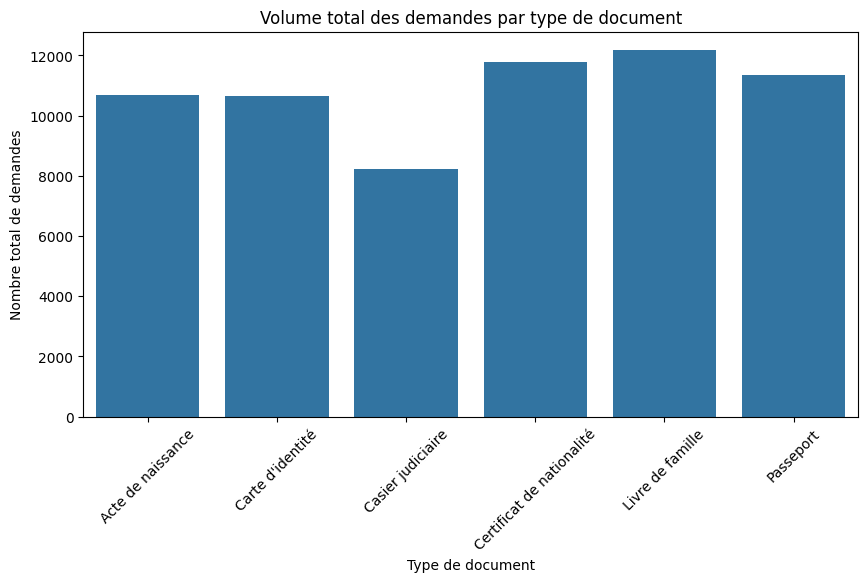

In [254]:
volume_par_doc = df_demandes.groupby('type_document')['nombre_demandes'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=volume_par_doc, x='type_document', y='nombre_demandes')
plt.title("Volume total des demandes par type de document")
plt.xlabel("Type de document")
plt.ylabel("Nombre total de demandes")
plt.xticks(rotation=45)
plt.show()


## **VIZ 2 - Boxplot des délais de traitement**

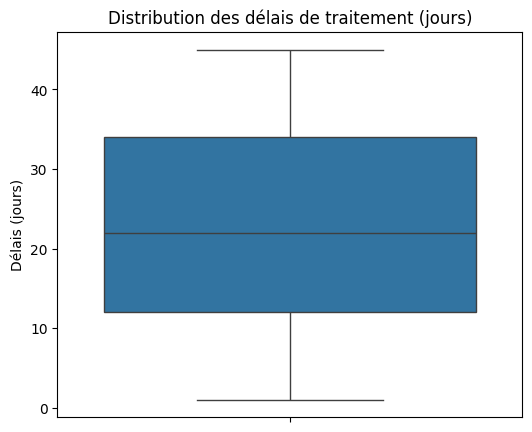

In [255]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_demandes, y='delai_traitement_jours')
plt.title("Distribution des délais de traitement (jours)")
plt.ylabel("Délais (jours)")
plt.show()


## **VIZ 3 - Histogramme des délais de traitement**

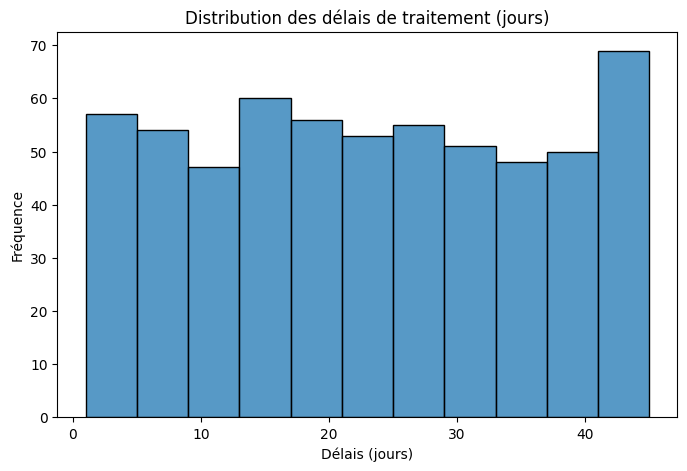

In [256]:
plt.figure(figsize=(8,5))
sns.histplot(df_demandes['delai_traitement_jours'], kde=False)
plt.title("Distribution des délais de traitement (jours)")
plt.xlabel("Délais (jours)")
plt.ylabel("Fréquence")
plt.show()


## **VIZ 4 - Histogramme capacité quotidienne (centres)**

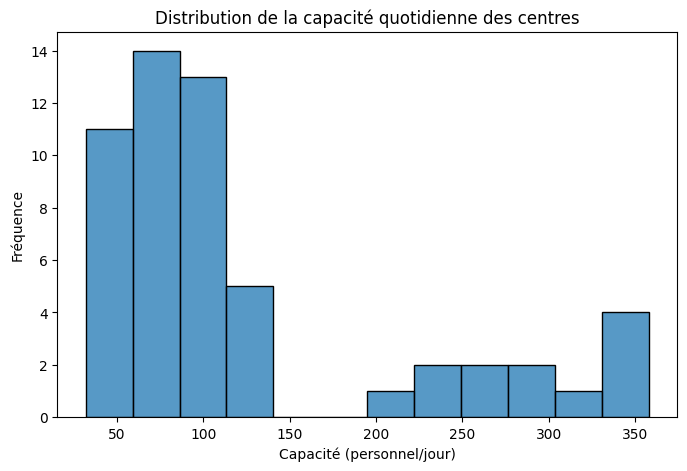

In [257]:
plt.figure(figsize=(8,5))
sns.histplot(df_centres['personnel_capacite_jour'], kde=False)
plt.title("Distribution de la capacité quotidienne des centres")
plt.xlabel("Capacité (personnel/jour)")
plt.ylabel("Fréquence")
plt.show()


## **VIZ 5 - Barplot des guichets par centre**

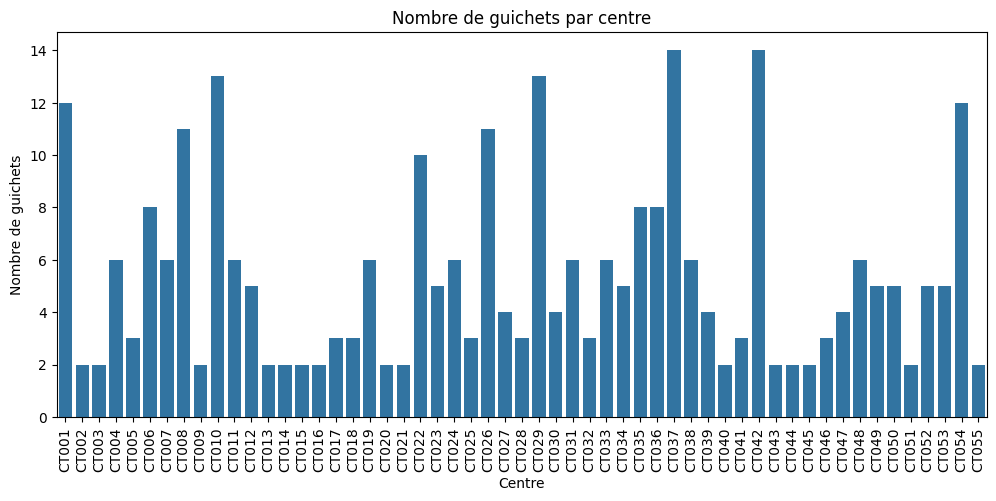

In [258]:
guichets_par_centre = df_centres[['centre_id', 'nombre_guichets']]

plt.figure(figsize=(12,5))
sns.barplot(data=guichets_par_centre, x='centre_id', y='nombre_guichets')
plt.title("Nombre de guichets par centre")
plt.xlabel("Centre")
plt.ylabel("Nombre de guichets")
plt.xticks(rotation=90)
plt.show()


## **VIZ 6 — Barplot des demandes par centre**

In [299]:
demandes_par_centre = (
    df_logs
    .groupby('centre_id')['nombre_traite']
    .sum()
    .reset_index()
    .rename(columns={'nombre_traite': 'total_traite'})
)



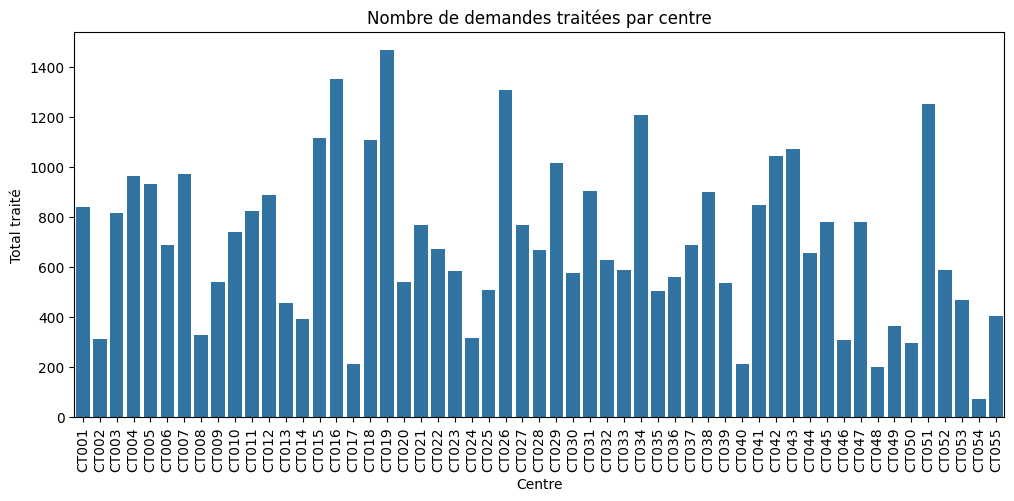

In [300]:
plt.figure(figsize=(12,5))
sns.barplot(data=demandes_par_centre, x='centre_id', y='total_traite')
plt.title("Nombre de demandes traitées par centre")
plt.xlabel("Centre")
plt.ylabel("Total traité")
plt.xticks(rotation=90)
plt.show()


## **VIZ 7 - Barplot demandes par région**

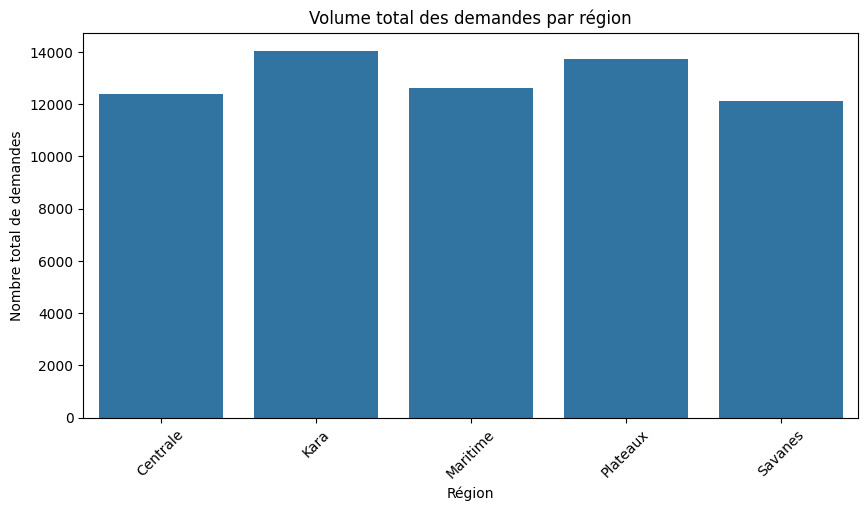

In [262]:
demandes_par_region = df_demandes.groupby('region')['nombre_demandes'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=demandes_par_region, x='region', y='nombre_demandes')
plt.title("Volume total des demandes par région")
plt.xlabel("Région")
plt.ylabel("Nombre total de demandes")
plt.xticks(rotation=45)
plt.show()


## **VIZ 8 - Barplot nombre de centre par région**

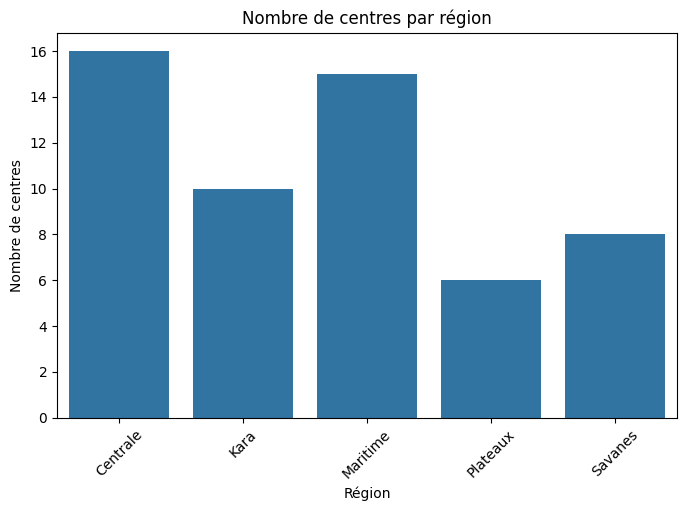

In [263]:
centres_par_region = (
    df_centres
    .groupby('region')['centre_id']
    .count()
    .reset_index()
    .rename(columns={'centre_id': 'nombre_centres'})
)

centres_par_region

plt.figure(figsize=(8,5))
sns.barplot(data=centres_par_region, x='region', y='nombre_centres')
plt.title("Nombre de centres par région")
plt.xlabel("Région")
plt.ylabel("Nombre de centres")
plt.xticks(rotation=45)
plt.show()


## **VIZ 9 - Line plot volume de demandes par mois**

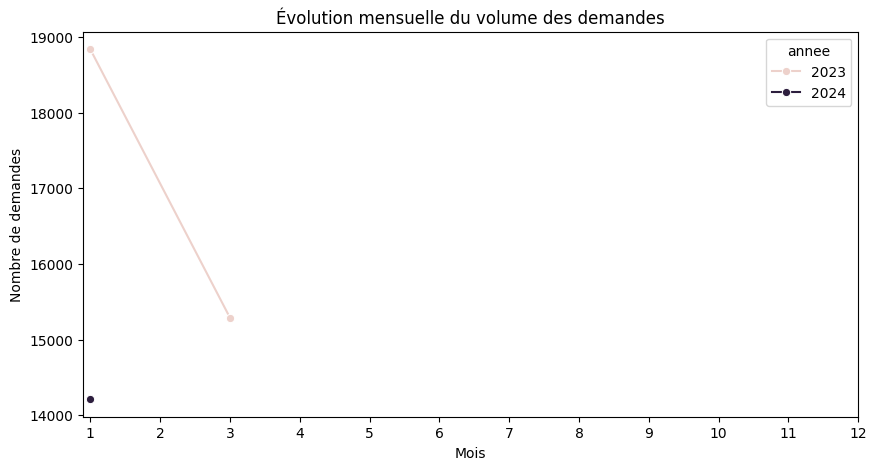

In [264]:
volume_par_mois = df_docs.groupby(['annee','mois'])['nombre_demandes'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=volume_par_mois, x='mois', y='nombre_demandes', hue='annee', marker='o')
plt.title("Évolution mensuelle du volume des demandes")
plt.xlabel("Mois")
plt.ylabel("Nombre de demandes")
plt.xticks(range(1,13))
plt.show()


# **SYNTHESE DE L'EDA**

# 📊 Synthèse EDA

## 1. Structure générale des données

L’exploration initiale montre que les jeux de données sont bien structurés, avec :

- une cohérence géographique (région → préfecture → commune)
- une cohérence opérationnelle (centre → logs → traitement)
- des agrégations temporelles disponibles (année, mois)

Les tables clés exploitées sont :

- `centres_services`
- `logs_activites`
- `documents_administratifs`
- `demandes_service`



## 2. Qualité des données

- **Valeurs manquantes** : globalement faibles
- **Doublons** : 3 doublons centres ayant le même nom et 2 commune ayant le même nom)
- **Types incohérents** : principalement sur les dates (conversion nécessaire)

Globalement, la qualité de données est correcte et le nettoyage requis est modéré.


## 3. Distribution spatiale

La répartition des centres est inégale :

- Régions les mieux dotées : **Centrale**, **Maritime**
- Régions sous-dotées : **Plateaux**, **Savanes**

➡ Cela indique une **accessibilité hétérogène** aux services publics selon les zones.


## 4. Distribution de la demande

Les volumes de demandes montrent :

- Pic dans les régions **Kara** et **Plateaux**
- Volume moyen dans **Maritime** et **Centrale**
- Volume plus faible dans **Savanes**

➡ On observe un **décalage** entre le nombre de centres et la demande réelle.


## 5. Charge opérationnelle des centres

L’analyse des `logs_activites` montre une **forte hétérogénéité** :

- Certains centres dépassent **1400 traitements**
- D’autres restent sous **300 traitements**

➡ La charge opérationnelle n’est pas uniformément répartie.


## 6. Capacité d’accueil des centres

Les indicateurs d’infrastructure montrent :

- Nombre de guichets : **1 à 14**
- Capacité journalière : **50 à 360 personnes/jour**

➡ Modèle en **centres principaux** et **centres secondaires**.


## 7. Délais de traitement

Analyse des délais (`documents_administratifs`) :

- Médiane ≈ **22 jours**
- IQR ≈ **12 à 34 jours**
- Maximum ≈ **45 jours**

➡ Les processus ne sont pas homogènes nationalement, et les délais moyens sont élevés au regard des attentes citoyennes pour les documents d’identité.


## 8. Typologie des demandes

Les documents les plus demandés concernent l’**identité civile** :

- Livre de famille
- Certificat de nationalité
- Passeport
- Acte de naissance

➡ Usage fréquent lié aux démarches administratives courantes.


## 🎯 Conclusion EDA

L’EDA met en évidence :

1. Une **couverture territoriale inégale**
2. Une **demande concentrée** dans certaines régions
3. Une **charge opérationnelle hétérogène**
4. Des **capacités physiques variables**
5. Des **délais de traitement élevés**
6. Une **demande orientée identité**

➡ Ces constats orientent la suite vers :

- l’analyse de la **saturation**
- la planification **territoriale**
- l’optimisation des **délais**


# **PHASE 2: Nettoyage et Préparation des Données**

## 1. Traitement des valeurs manquantes

| Dataset | Colonne |  NA | Action | Justification |
|---|---|---|---|---|
| logs_activites | type_document | 80 | Imputation "inconnu" | Perte d'information si suppression |
| logs_activites | raison_rejet | **103** | Imputation "non_precise" | Indique rejet non spécifié |
| ... | ... | ... | ... | ... |

In [285]:
df_logs['type_document'] = df_logs['type_document'].fillna('inconnu')
df_logs['raison_rejet'] = df_logs['raison_rejet'].fillna('non_precise')


In [304]:
#supprimer le duplicat de commune
df_communes = df_communes.drop_duplicates(subset=['commune'])

## 2. Harmonisation des formats

Actions réalisées :
- conversion des dates en dtype `datetime`
- normalisation des chaînes en `lower + strip` pour la géographie \
Colonnes :
`region`, `prefecture`, `commune`
Traitements :
  - uniformisation minuscule
  - suppression des accents
  - suppression des espaces

- conversion de `annee` et `mois` au format entier

In [287]:
# -----------------------------
#  Conversion des dates
# -----------------------------
date_cols_centres = ['date_ouverture']
date_cols_logs = ['date_operation']
date_cols_demandes = ['date_demande']

for col in date_cols_centres:
    if col in df_centres.columns:
        df_centres[col] = pd.to_datetime(df_centres[col], errors='coerce')

for col in date_cols_logs:
    if col in df_logs.columns:
        df_logs[col] = pd.to_datetime(df_logs[col], errors='coerce')

for col in date_cols_demandes:
    if col in df_demandes.columns:
        df_demandes[col] = pd.to_datetime(df_demandes[col], errors='coerce')

In [290]:
# -----------------------------
# UTILS : Normalisation texte
# -----------------------------
def normalize_text_series(s):
    """Normalize strings: lowercase + strip + remove accents"""
    if s.dtype != 'object':
        return s
    s = s.str.lower().str.strip()
    s = s.apply(lambda x: ''.join(c for c in unicodedata.normalize('NFD', x)
                                  if unicodedata.category(c) != 'Mn') if isinstance(x, str) else x)
    return s


In [295]:
# -----------------------------
# 1. Normalisation géographique
# -----------------------------
geo_cols = ['region', 'prefecture', 'commune']

for col in geo_cols:
    if col in df_communes.columns:
        df_communes[col] = normalize_text_series(df_communes[col])
    if col in df_centres.columns:
        df_centres[col] = normalize_text_series(df_centres[col])
    if col in df_docs.columns:
        df_docs[col] = normalize_text_series(df_docs[col])
    if col in df_logs.columns:
        df_logs[col] = normalize_text_series(df_logs[col])
    if col in df_demandes.columns:
        df_demandes[col] = normalize_text_series(df_demandes[col])
    if col in df_socio.columns:
        df_socio[col] = normalize_text_series(df_socio[col])


In [288]:
# Conversion de annee et mois au format entier

int_cols = ['annee', 'mois']
for col in int_cols:
    if col in df_docs.columns:
        df_docs[col] = df_docs[col].astype(int, errors='ignore')

# **Export dataset final propre**

In [308]:
df_communes.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_communes.csv", index=False)
df_centres.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_centres.csv", index=False)
df_docs.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_documents.csv", index=False)
df_logs.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_logs.csv", index=False)
df_demandes.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_demandes.csv", index=False)
df_socio.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_socio.csv", index=False)
df_dev.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_dev.csv", index=False)
df_routes.to_csv("Documents/gyj/Test_technique_analyst/data/clean_dataset/clean_route.csv", index=False)
